## Проверка на стационарность и ML

**Но для начала прикол с сайта анекдот.ру**
<img src="https://www.anekdot.ru/i/caricatures/normal/23/3/26/1679860630.jpg" width="300">


### Первое, чем мы займемся в этой части - проверим стационарность процесса

**Зачем это нужно?**   

Проверка стационарности временного ряда является важным шагом в анализе данных, особенно в анализе временных рядов. Стационарность означает, что статистические свойства временного ряда не меняются со временем. Если временной ряд является стационарным, это позволяет применять множество статистических методов и моделей, которые предполагают стационарность данных. 
В дальнейшем мы будем строить модель, которая будет предсказывать продолжительность жизни. Стационарный временной ряд обладает устойчивыми статистическими свойствами, что делает его более предсказуемым. Задачи регрессии обычно требуют стационарность данных, и поэтому нашим данным требуется такая проверка. 
Также анализ стационарного ряда позволяет более точно выявить тренды и цикличность в данных. Это может быть полезно для понимания долгосрочных изменений и периодичности во временном ряду. И наконец, при проведении статистических тестов и проверке гипотез, предположение о стационарности данных может быть важным условием для правильности выводов и интерпретации результатов  

**Реализация**
Сама по себе проверка стационарности является процедурой, а не гипотезой.
Гипотеза обычно формулируется перед проведением теста на стационарность. Нулевая гипотеза $H_0$ состоит в том, что временной ряд имеет единые корни и, следовательно, нестационарен. Альтернативная гипотеза $H_1$ предполагает, что временной ряд является стационарным, то есть не имеет единых корней.

Тесты на стационарность, например тест Дики-Фулера, который мы и будем проводить далее, позволяют оценить вероятность того, что нулевая гипотеза верна. Результаты теста дают p-значение, на основании которого можно принять решение о том, отклонять или нет нулевую гипотезу.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.special import inv_boxcox

In [2]:
# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('final_dataset_2.csv')

In [4]:
data = data.sort_values(['Регион','Год'])
data

,Регион,Год,Число больничных коек,Мощность амбулаторно-поликлинических организаций,Численность врачей всех специальностей,Численность среднего медицинского персонала,Заболеваемость на 1000 человек населения,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Число предприятий и организаций,Выбросы загрязняющих веществ в атмосферный воздух,Улавливание загрязняющих атмосферу веществ,Сброс загрязненных сточных вод в поверхностные водные объекты,Средняя продолжительность жизни,ФО
0,Алтайский край,2005,117.7,281.1,46.7,109.9,987.2,4640.0,853.7,21857.0,233.0,787.0,34.0,64.62,siberian
1,Алтайский край,2010,112.1,347.8,48.7,109.2,1035.7,11029.0,668.0,21857.0,207.0,776.0,15.0,68.36,siberian
2,Алтайский край,2011,108.1,285.5,50.4,111.9,1052.4,12500.0,646.4,56770.0,204.0,712.0,12.0,68.97,siberian
3,Алтайский край,2012,105.0,292.6,46.0,109.7,1087.5,13617.0,637.2,53684.0,216.0,822.0,8.0,69.11,siberian
4,Алтайский край,2013,103.6,294.3,45.7,109.4,1090.3,15896.0,623.1,55454.0,201.0,558.0,8.0,69.77,siberian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,г. Санкт-Петербург,2021,84.7,374.2,91.6,110.3,1200.6,57745.0,494.8,21857.0,72.0,33.0,998.0,72.51,north_western
1090,г. Севастополь,2014,70.5,208.3,41.1,82.4,561.8,22884.0,498.9,5690.0,1.0,0.5,19.0,72.28,southern
1091,г. Севастополь,2016,60.2,191.6,40.2,78.3,515.8,26239.0,551.6,10549.0,4.0,2.0,22.0,71.64,southern
1092,г. Севастополь,2017,82.6,198.8,46.8,93.4,531.9,28130.0,436.2,11214.0,5.0,2.0,23.0,73.37,southern


In [5]:
from statsmodels.tsa.stattools import adfuller

Для начала посмотрим, как вообще работает данный тест, что мы получаем на выходе, чтобы понимать, как лучше проверять процессы. Чтобы это сделать, мы запустим тест для нескольких рандомных регионов и показателей. На такой проверки мы получили несколько стационарных и несколько нестационарых рядов, то есть заранее пониммаем, что вероятно придется приводить вся ряды к стационарным

In [6]:
series = data[data['Регион'] == 'Алтайский край']['Мощность амбулаторно-поликлинических организаций']
#series = data[data['Регион'] == 'Алтайский край']['Число больничных коек']

# Предположим, что у нас есть временной ряд, хранящийся в переменной 'series'
result = adfuller(series)

# Извлекаем значения тестовой статистики и критические значения из результата
test_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Выводим результаты теста
print(f"Тестовая статистика: {test_statistic}")
print(f"P-значение: {p_value}")
print("Критические значения:")
for key, value in critical_values.items():
    print(f"{key}: {value}")

if p_value < 0.05 :
    print('Н0 о нестационарности ряда может быть отвергнута')
else:
    print('Н0 о нестационарности ряда не может быть отвергнута')

Тестовая статистика: -3.2221334719886485
P-значение: 0.018738726020947914
Критические значения:
1%: -4.223238279489106
5%: -3.189368925619835
10%: -2.729839421487603
Н0 о нестационарности ряда может быть отвергнута


Итак, запусстим цикл, который будет проверять стационарность каждого ряда (каждого показатель) по каждому региону, чтобы выяснить, какова доля нестационарных процессов в нашем случае.  
Сначала мы рассчитывали доля нестационарных рядов будет небольшая и мы сможем просто пренебречь ими, и затем строить модель, предполагая, что все стационарно, но у нас получилось, что около 65% процессов нестационарны, что достаточно много

In [7]:
regions = set(data['Регион'])
regions

{'Алтайский край',
 'Амурская область',
 'Архангельская область',
 'Архангельская область без автономного округа',
 'Астраханская область',
 'Белгородская область',
 'Брянская область',
 'Владимирская область',
 'Волгоградская область',
 'Вологодская область',
 'Воронежская область',
 'Еврейская автономная область',
 'Забайкальский край',
 'Ивановская область',
 'Иркутская область',
 'Кабардино-Балкарская Республика',
 'Калининградская область',
 'Калужская область',
 'Камчатский край',
 'Карачаево-Черкесская Республика',
 'Кемеровская область',
 'Кировская область',
 'Костромская область',
 'Краснодарский край',
 'Красноярский край',
 'Курганская область',
 'Курская область',
 'Ленинградская область',
 'Липецкая область',
 'Магаданская область',
 'Московская область',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Нижегородская область ',
 'Новгородская область',
 'Новосибирская область ',
 'Омская область',
 'Оренбургская область',
 'Орловская область',
 'Пензенская область',

In [8]:
non_stationary = 0
n_process = 0

for region in regions:
    for feature in data.columns[2:-1]:
        n_process += 1
        series = data[data['Регион'] == region][feature]
        p_value = adfuller(series)[1]
        if p_value > 0.1:
            non_stationary +=1

non_stationary / n_process

0.6580459770114943

Теперь попробуем уменьшить долю нестационарных процессов, применив преобразвание log1p (логарифм 1+x). В результате доля сократилась достаточно существенно: теперь для нестационарных процессов 0.37, что уже неплохо. В целом, учитывая достаточно сложную структуру данных, мы уже радуемся, птому что даже такое улучшение уже очень хорошо для модели. 

In [9]:
non_stationary = 0
n_process = 0

for region in regions:
    series = data[data['Регион'] == region]
    series = series.drop(series.columns[[0, 1, -1]], axis=1)
    for feature in data.columns[2:-1]:
        n_process += 1
        series_1 = np.log1p(series[feature])
        p_value = adfuller(series_1)[1]
        if p_value > 0.5:
            non_stationary +=1

non_stationary / n_process

0.3716475095785441

Далее мы смотрим, как получится улучшить стационарность с помощью diff. Мы смотрим на 3 значения p-value: вообще без diff, первые разности и вторые разности, а затем записываем это все в дф. После аггрегируем данные:

In [10]:
pvalues = []
for feature in data.columns[2:-1]:
    for region in regions:
        try:
            pval0 = adfuller(data.loc[(data['Регион']==region)&(data['Год']>2005), feature].dropna())[1]
        except ValueError:
            pval0 = np.nan
        try:
            pval1 = adfuller(data.loc[(data['Регион']==region)&(data['Год']>2005), feature].diff().dropna())[1]
        except ValueError:
            pval1 = np.nan
        try:
            pval2 = adfuller(data.loc[(data['Регион']==region)&(data['Год']>2005), feature].diff().diff().dropna())[1]
        except ValueError:
            pval2 = np.nan
        pvalues.append({
                'region' : region,
                'feature' : feature,
                'pvalue0' : pval0,
                'pvalue1' : pval1,
                'pvalue2' : pval2
            })

In [11]:
pd.DataFrame(pvalues).groupby('feature').agg(lambda s : (s<0.1).sum()/87)

,pvalue0,pvalue1,pvalue2
feature,,,
Выбросы загрязняющих веществ в атмосферный воздух,0.298851,0.620690,0.666667
Заболеваемость на 1000 человек населения,0.275862,0.563218,0.586207
Мощность амбулаторно-поликлинических организаций,0.241379,0.643678,0.689655
Сброс загрязненных сточных вод в поверхностные водные объекты,0.229885,0.689655,0.735632
Смертность населения в трудоспособном возрасте,0.321839,0.241379,0.597701
Среднедушевые денежные доходы населения,0.091954,0.494253,0.747126
Средняя продолжительность жизни,0.310345,0.149425,0.505747
Улавливание загрязняющих атмосферу веществ,0.321839,0.689655,0.655172
Численность врачей всех специальностей,0.321839,0.528736,0.747126


Итак, мы видим, что без разности у нас очень грустная ситуация, с точки зрения стационарности, в первой и второй разности все уже более-менее терпимо. Но, вторую разность использовать не получится, потому чтов нашей out-of-time выборке мы планируем выделять в тест 3 последних года, а если предсказывать вторую разность, то унасиз трех лет останется только один год, что абсолютно нерепрезентативно.  

## Machine Learning 

In [12]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler

In [13]:
# Выделим признаки (X) и целевую переменную (y)
X = data.drop(['Средняя продолжительность жизни', 'Регион'], axis=1)
y = data['Средняя продолжительность жизни']

# Применим One-Hot Encoding к столбцу с категориальными данными
X = pd.get_dummies(X, columns=['ФО'])

In [14]:
train_idx = data['Год']>2018

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(X.loc[train_idx], y.loc[train_idx])
np.sqrt(((reg.predict(X.loc[~train_idx]) - y.loc[~train_idx])**2).mean())

7.374407604315727

Тут мы попробовалли построить линейную регресссию со всеми фичами, однако получили, что ошибка в итоге более 7 лет, что в масштабе предсказания продолжительности жизни очень много. С таким же успехом можно просто во все регионы назвать среднее по стране и быть точнее, чем такая модель(((  

Будем пробовать дальше! Можно отобрать всего несколько фичей для предсказания, так как мы уже знаем, что не все скоррелировано с нашей целевой переменной и вообще не все сильно на нее влияет, как оказывается. Но сначала мы посмторим, какие фичи лучше всего предсказывают наш таргет

Ниже представлен код, в котором мы регрессируем таргет на прирост фичи с лагом в один год

In [16]:
features_mse = []
# сдвигаем Y так, чтобы предсказывать на основании X Y через год
y_lagged = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 
notnan_y = y_lagged.notna()

for c in X.columns[1:-8]:
    
    reg = LinearRegression()
    
    X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff())
    notnan_x = X_diff.notna()
    
    fed_okrug = X.columns[-7:].tolist()
    
    X_train = pd.concat([X[fed_okrug], X_diff], axis=1).loc[train_idx&notnan_y&notnan_x]
    y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
    X_test = pd.concat([X[fed_okrug], X_diff], axis=1).loc[~train_idx&notnan_y&notnan_x]
    y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]
    
    #print(X_train.isna().any())
    reg.fit(X_train , y_train)
    y_pred = reg.predict(X_test)
    
    features_mse.append({'feature' : c, 'mse' : mean_squared_error(y_test, y_pred)})
    
    print(c, mean_squared_error(y_test, y_pred))

Число больничных коек 5.60692270898163
Мощность амбулаторно-поликлинических организаций 5.678428503450134
Численность врачей всех специальностей 5.475899025336502
Численность среднего медицинского персонала 6.144680543115846
Заболеваемость на 1000 человек населения 5.437116258243775
Среднедушевые денежные доходы населения 7.5384920188795554
Смертность населения в трудоспособном возрасте 5.8795889055227475
Число предприятий и организаций 5.929133544641712
Выбросы загрязняющих веществ в атмосферный воздух 5.423870077339952
Улавливание загрязняющих атмосферу веществ 5.428832913137452
Сброс загрязненных сточных вод в поверхностные водные объекты 5.503054536313969


In [17]:
features_mse = pd.DataFrame(features_mse).sort_values('mse')

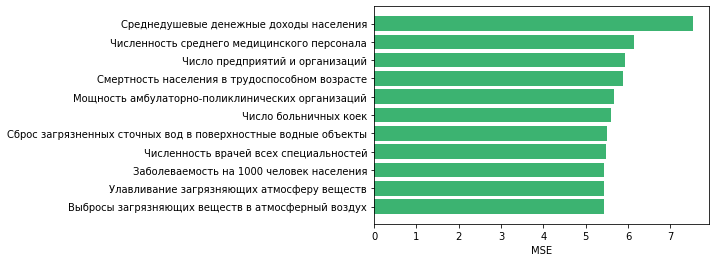

In [18]:
plt.barh(features_mse['feature'], features_mse['mse'], color = 'mediumseagreen')

_=plt.xlabel('MSE')

А теперь попробуем тоже самое, но **для второй разности**  
Сначала для одной фичи:

In [19]:
c = 'Число больничных коек'
reg = LinearRegression()
X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff().diff())
notnan_x = X_diff.notna()
fed_okrug = X.columns[-7:].tolist()
#fed_okrug = []
X_train = pd.concat([X[fed_okrug], X_diff], axis=1).loc[train_idx&notnan_y&notnan_x]
y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
X_test = pd.concat([X[fed_okrug], X_diff], axis=1).loc[~train_idx&notnan_y&notnan_x]
y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]
#     print(X_train.isna().any())
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)
print(c, mean_squared_error(y_test, y_pred))

Число больничных коек 5.397434723800769


<Axes: xlabel='Средняя продолжительность жизни'>

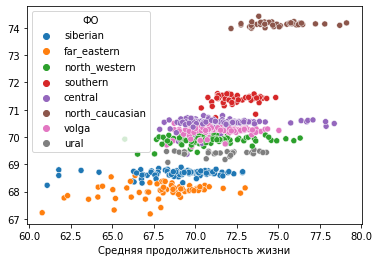

In [20]:
import seaborn as sns
sns.scatterplot(y_test, y_pred, hue=data.loc[~train_idx&notnan_y&notnan_x, 'ФО'])

Теперь мы видим, что на графике все субъекты из одного ФО имеют почти идентичные предсказания, поэтому попробуем убрать из рассмотрения федеральный округ, так как есть подозрение, что он просто забирает на себя всю дисперсию и мы полностью на нем основываем предсказание

Число больничных коек 7.956246869926309


<Axes: xlabel='Средняя продолжительность жизни'>

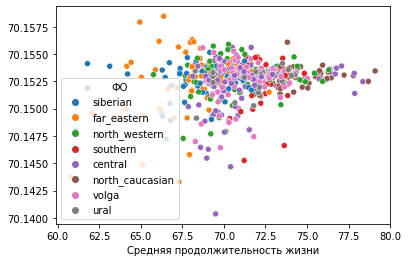

In [21]:
c = 'Число больничных коек'
reg = LinearRegression()
X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff().diff())
notnan_x = X_diff.notna()
#fed_okrug = X.columns[-7:].tolist()
fed_okrug = []
X_train = pd.concat([X[fed_okrug], X_diff], axis=1).loc[train_idx&notnan_y&notnan_x]
y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
X_test = pd.concat([X[fed_okrug], X_diff], axis=1).loc[~train_idx&notnan_y&notnan_x]
y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]
#     print(X_train.isna().any())
reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)
print(c, mean_squared_error(y_test, y_pred))

import seaborn as sns
sns.scatterplot(y_test, y_pred, hue=data.loc[~train_idx&notnan_y&notnan_x, 'ФО'])

Ситуация стала лучше, но у нас очень маленькая дисперсия предсказаний: мы просто предсказываем всем около 70 лет, а такая модель не имеет смысла.   
Теперь попробуем для всех фичей проделать аналогичный расчет и построить визуализацию, но уже с первыми разностями, так как ощущение, что вторая разница *'съела'* всю дисперсию:

Без учета ФО:

Число больничных коек 7.759091066724565
Мощность амбулаторно-поликлинических организаций 8.354921369176456
Численность врачей всех специальностей 7.99899210977035
Численность среднего медицинского персонала 9.405551883974834
Заболеваемость на 1000 человек населения 8.019564832634561
Среднедушевые денежные доходы населения 8.102263663860349
Смертность населения в трудоспособном возрасте 8.321085706776701
Число предприятий и организаций 8.341429517120645
Выбросы загрязняющих веществ в атмосферный воздух 7.926156896386521
Улавливание загрязняющих атмосферу веществ 7.922873707410063
Сброс загрязненных сточных вод в поверхностные водные объекты 8.023157538520575


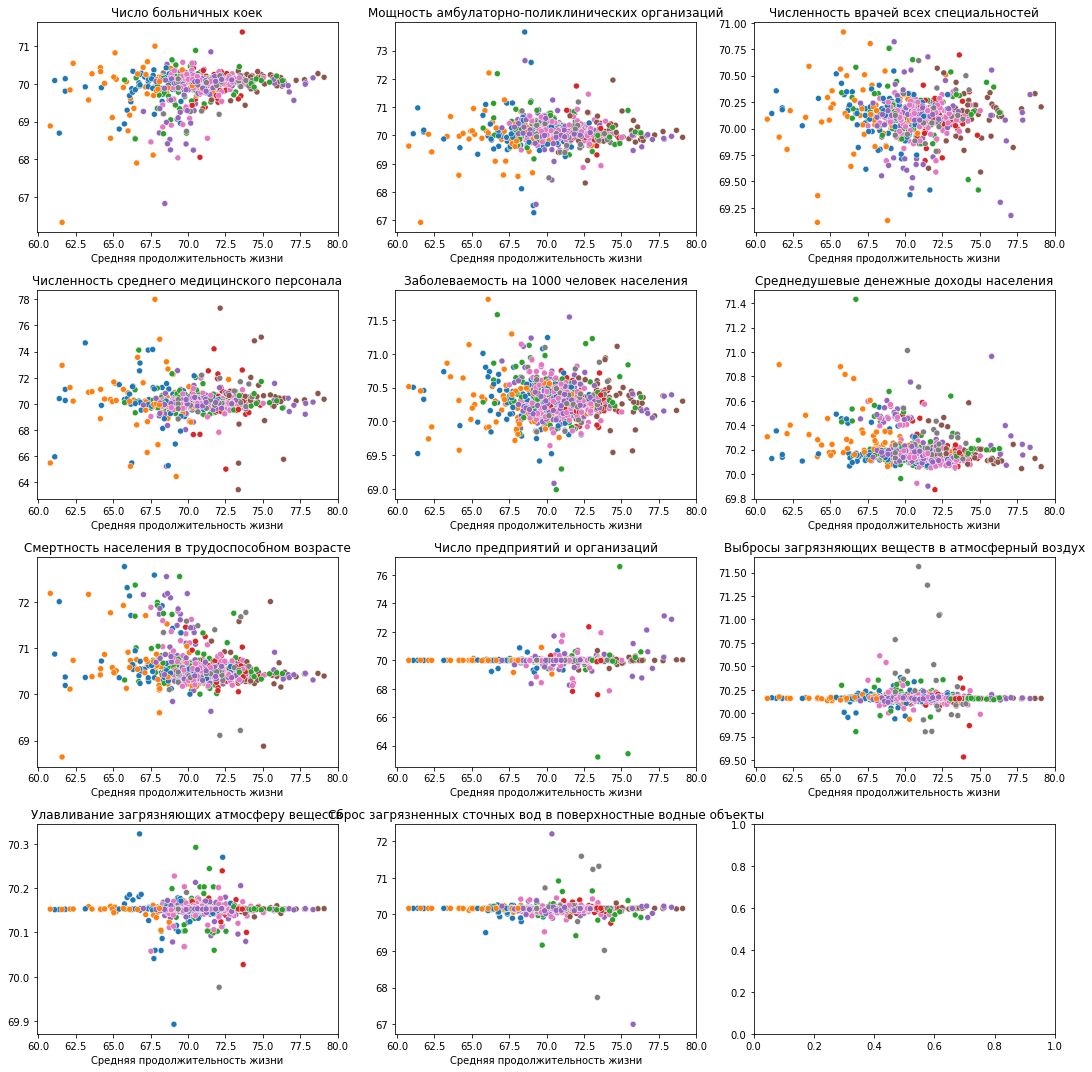

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(15,15), tight_layout=True)

for c, ax in zip(X.columns[1:-8], axs.flat[:-1]):
    
    reg = LinearRegression()
    X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff())
    notnan_x = X_diff.notna()
    
    fed_okrug = X.columns[-7:].tolist()
    fed_okrug = []
    X_train = pd.concat([X[fed_okrug], X_diff], axis=1).loc[train_idx&notnan_y&notnan_x]
    y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
    X_test = pd.concat([X[fed_okrug], X_diff], axis=1).loc[~train_idx&notnan_y&notnan_x]
    y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]
    #     print(X_train.isna().any())
    reg.fit(X_train , y_train)
    y_pred = reg.predict(X_test)
    print(c, mean_squared_error(y_test, y_pred))
    sns.scatterplot(y_test, y_pred, hue=data.loc[~train_idx&notnan_y&notnan_x, 'ФО'], ax=ax, legend=None)
    ax.set_title(c) 

С учетом ФО:

Число больничных коек 5.60692270898163
Мощность амбулаторно-поликлинических организаций 5.678428503450134
Численность врачей всех специальностей 5.475899025336502
Численность среднего медицинского персонала 6.144680543115846
Заболеваемость на 1000 человек населения 5.437116258243775
Среднедушевые денежные доходы населения 7.5384920188795554
Смертность населения в трудоспособном возрасте 5.8795889055227475
Число предприятий и организаций 5.929133544641712
Выбросы загрязняющих веществ в атмосферный воздух 5.423870077339952
Улавливание загрязняющих атмосферу веществ 5.428832913137452
Сброс загрязненных сточных вод в поверхностные водные объекты 5.503054536313969


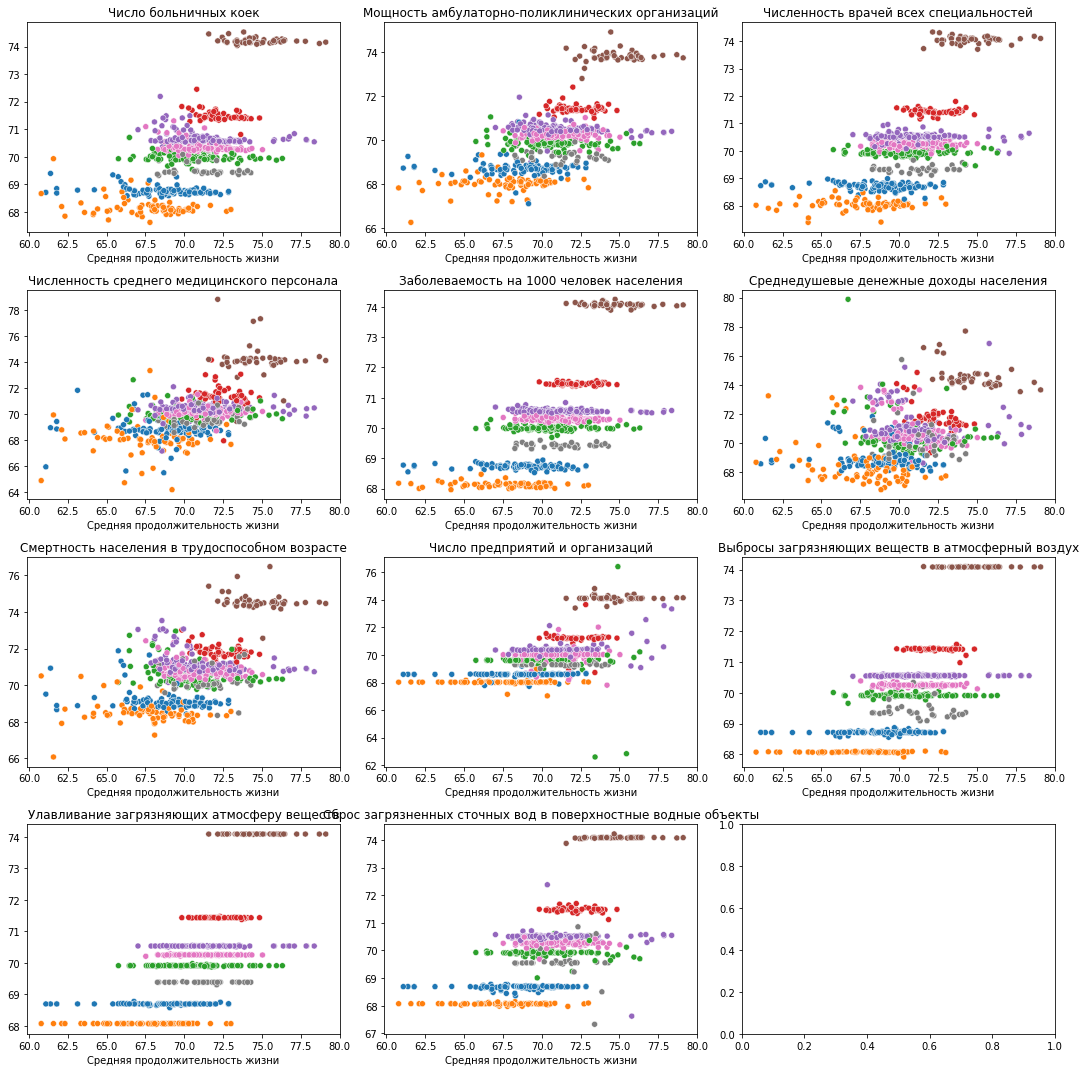

In [23]:
fig, axs = plt.subplots(4, 3, figsize=(15,15), tight_layout=True)

for c, ax in zip(X.columns[1:-8], axs.flat[:-1]):
    
    reg = LinearRegression()
    X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff())
    notnan_x = X_diff.notna()
    
    fed_okrug = X.columns[-7:].tolist()
    #fed_okrug = []
    X_train = pd.concat([X[fed_okrug], X_diff], axis=1).loc[train_idx&notnan_y&notnan_x]
    y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
    X_test = pd.concat([X[fed_okrug], X_diff], axis=1).loc[~train_idx&notnan_y&notnan_x]
    y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]
    #     print(X_train.isna().any())
    reg.fit(X_train , y_train)
    y_pred = reg.predict(X_test)
    print(c, mean_squared_error(y_test, y_pred))
    sns.scatterplot(y_test, y_pred, hue=data.loc[~train_idx&notnan_y&notnan_x, 'ФО'], ax=ax, legend=None)
    ax.set_title(c) 

Нам снова остается только заплакать, смотря на получившиеся картинки. Наша модель может только предсказывать среднее по региону. Оно конечно в теории будет соответствовать действительности, но это все-таки не то, чего нам хотелось бы. Очень грустно.....

Но мы будем позориться до победного и попытаемся построить еще одну модель, выбрав те фичи, которые показали наиболее адекватные картинки на предыдущих визуализациях

In [24]:
X_gm = X[['Число больничных коек', 'Численность врачей всех специальностей', 'Заболеваемость на 1000 человек населения', 'Смертность населения в трудоспособном возрасте']]
y_gm = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 

reg = LinearRegression()

notnan_y = y_gm.notna()

X_train_gm = X_gm.loc[train_idx&notnan_y]
y_train_gm = y_gm.loc[train_idx&notnan_y]
X_test_gm = X_gm.loc[~train_idx&notnan_y]
y_test_gm = y_gm.loc[~train_idx&notnan_y]

reg.fit(X_train_gm, y_train_gm)

y_pred_gm = reg.predict(X_test_gm)
print(f'MSE на тестовой выборке {mean_squared_error(y_test_gm, y_pred_gm)}')
      
y_pred_gm2 = reg.predict(X_train_gm)
print(f'MSE на обучающей выборке {mean_squared_error(y_train_gm, y_pred_gm2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test_gm, y_pred_gm)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train_gm, y_pred_gm2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test_gm, y_pred_gm)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train_gm, y_pred_gm2)}')


MSE на тестовой выборке 4.751796016299453
MSE на обучающей выборке 1.0216793120531302
MAE на тестовой выборке 1.8196813018729938
MAE на обучающей выборке 0.6509502242507976
MAPE на тестовой выборке 0.02587732517380045
MAPE на обучающей выборке 0.009166832077467846


Мы видим, что качество улучшилось относительно прошлых попыток, однако MSE на тестовой и обучающей выборках отличаются в три раза, значит модель переобучилась (мы не можем использовать тут кросс-валидацию, потому что нас интересует out-of-time выборка, мы не хотим сразу передавать в модель на обучение все года, которые у нас есть)    

В этом предсказании не участвует год, теперь попробуем добавить еще его и посмотрим как поведет себя качество модели, мб получится хоть как-то ее улучшить

In [25]:
X_new = X[['Год','Число больничных коек', 'Численность врачей всех специальностей', 'Заболеваемость на 1000 человек населения', 'Смертность населения в трудоспособном возрасте']]
y_new = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 

reg = LinearRegression()

notnan_y = y_new.notna()

X_train_new = X_new.loc[train_idx&notnan_y]
y_train_new = y_new.loc[train_idx&notnan_y]
X_test_new = X_new.loc[~train_idx&notnan_y]
y_test_new = y_new.loc[~train_idx&notnan_y]

reg.fit(X_train_new, y_train_new)

y_pred_new = reg.predict(X_test_new)
print(f'MSE на тестовой выборке {mean_squared_error(y_test_new, y_pred_new)}')
      
y_pred_new2 = reg.predict(X_train_new)
print(f'MSE на обучающей выборке {mean_squared_error(y_train_new, y_pred_new2)}')
      
print(f'MAE на тестовой выборке {mean_absolute_error(y_test_new, y_pred_new)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train_new, y_pred_new2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test_new, y_pred_new)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train_new, y_pred_new2)}')
   

MSE на тестовой выборке 6.333938423874699
MSE на обучающей выборке 0.9717872257009108
MAE на тестовой выборке 1.9899155475845285
MAE на обучающей выборке 0.6378731435906962
MAPE на тестовой выборке 0.02855789332913493
MAPE на обучающей выборке 0.008976352927177862


О нет, стало еще хуже, она еще сильнее переобучилась. Грусть печаль((

Ёжики плакали, кололись, но продолжали есть кактус, вот и мы продолжаем пытаться выжать хоть что-то приличное из всего этого

In [26]:
c = ['Число больничных коек', 'Численность врачей всех специальностей', 'Заболеваемость на 1000 человек населения', 'Смертность населения в трудоспособном возрасте']
y_lagged = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 

reg = LinearRegression()

X_diff = data.groupby('Регион')[c].apply(lambda s : s.diff())
notnan_x = X_diff.notna()[c[0]]


X_train = X_diff.loc[train_idx&notnan_y&notnan_x]
y_train = y_lagged.loc[train_idx&notnan_y&notnan_x]
X_test = X_diff.loc[~train_idx&notnan_y&notnan_x]
y_test = y_lagged.loc[~train_idx&notnan_y&notnan_x]

reg.fit(X_train , y_train)
y_pred = reg.predict(X_test)

print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = reg.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')
  
print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

      

MSE на тестовой выборке 8.275043829843181
MSE на обучающей выборке 4.916244780928856
MAE на тестовой выборке 2.0909951035483108
MAE на обучающей выборке 1.50622235759902
MAPE на тестовой выборке 0.02953190307965675
MAPE на обучающей выборке 0.021205933533205237


Надежда на хорошую модель с каждым новым выводом угасает. 

Мы видим, что линейная регрессия не подходит для наших данных, так как все варианты, которые мы попробовали не дают нам удовлетворительного результата. Возможно, наши данные имеют нелинейные зависимости, либо предсказания представляется возможным строить не в разрезе одного года, а для десятилетий, что при имеющихся массивах данных не представляется возможным

Но как можно было уже догадаться, мы на этом не остановимся)) 

Попробуем запустить еще несколько моделей, но уже не линейной регресссии и после этого перейдем к выводам о возможности прогнозирования на такого рода данных.

Для начала заново зададим трейн и тест, куда возьмем самые подходящие для прогнозирования показатели, выявленные ранее:

In [60]:
X = X[['Число больничных коек', 'Численность врачей всех специальностей', 'Заболеваемость на 1000 человек населения', 'Смертность населения в трудоспособном возрасте']]
y = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 

notnan_y = y.notna()

X_train = X.loc[train_idx&notnan_y]
y_train = y.loc[train_idx&notnan_y]
X_test = X.loc[~train_idx&notnan_y]
y_test = y.loc[~train_idx&notnan_y]


### Метод k-ближайших соседей (kNN) :

In [61]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = knn.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 3.518968270577355
MSE на обучающей выборке 1.0982287202141896
MAE на тестовой выборке 1.5112548553309546
MAE на обучающей выборке 0.6908473895582338
MAPE на тестовой выборке 0.021363798217548146
MAPE на обучающей выборке 0.00974528167859562
R^2 на тестовой выборке 0.5662099507655904
R^2 на обучающей выборке 0.7910045776025463


### Регрессия на основе деревьев (Decision Tree Regression)

In [62]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = tree.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 3.5464060492400096
MSE на обучающей выборке 0.5182138402073914
MAE на тестовой выборке 1.5972271974029402
MAE на обучающей выборке 0.503081519729714
MAPE на тестовой выборке 0.022626549760096155
MAPE на обучающей выборке 0.007168400151393938
R^2 на тестовой выборке 0.5628276425315343
R^2 на обучающей выборке 0.9013827279938303


### Случайный лес (Random Forest) 

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = rf.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 3.1543455996787406
MSE на обучающей выборке 0.38872111389442093
MAE на тестовой выборке 1.514365279947625
MAE на обучающей выборке 0.4168563675826243
MAPE на тестовой выборке 0.021455183821489806
MAPE на обучающей выборке 0.005921722712993609
R^2 на тестовой выборке 0.6111576951608932
R^2 на обучающей выборке 0.9260254882267798


### Градиентный бустинг (Gradient Boosting) 

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = gb.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')


MSE на тестовой выборке 3.3580540446690614
MSE на обучающей выборке 0.08863993381676126
MAPE на обучающей выборке 0.0030658140926871076
MAE на тестовой выборке 1.594664283041834
MAE на обучающей выборке 0.21462247027226364
MAPE на тестовой выборке 0.022605986463125442
MAPE на обучающей выборке 0.0030658140926871076
R^2 на тестовой выборке 0.5860461597370975
R^2 на обучающей выборке 0.9831316190622812


Сначала попробовали с рандомными параметрами, потом подбирали циклом, тк grid search cv работает на кроссс-валидации, а мы не можем ее реализовать, как уже было сказано ранее (тк обучаем модель на out-of-time выборке)

In [65]:
from sklearn.model_selection import GridSearchCV

model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],     # количество деревьев
    'learning_rate': [0.1, 0.05, 0.01],  # скорость обучения
    'max_depth': [3, 4, 5]               # максимальная глубина деревьев
}

best_score = float('inf')  # начальное значение лучшей оценки
best_params = None  # начальное значение лучших параметров

# Перебор всех комбинаций параметров
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for max_depth in param_grid['max_depth']:
            # Создание модели с текущими параметрами
            model.set_params(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
            
            # Обучение модели
            model.fit(X_train, y_train)
            
            # Оценка модели на тестовых данных
            y_pred = model.predict(X_test)
            mse1 = mean_squared_error(y_test, y_pred)
            
            # Оценка модели на тренироваочных данных 
            y_pred2 = model.predict(X_train)
            mse2 = mean_squared_error(y_train, y_pred2)
            
            # Проверка, является ли текущая оценка лучшей
            if (mse1 - mse2) < best_score:
                best_score = mse1
                best_params = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'max_depth': max_depth}

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", best_params)
print("Лучшая оценка:", best_score)

Лучшие параметры: {'n_estimators': 300, 'learning_rate': 0.01, 'max_depth': 5}
Лучшая оценка: 3.2212396104096994


In [67]:
gb = GradientBoostingRegressor(**best_params)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = gb.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 3.226659116805755
MSE на обучающей выборке 0.15566749086798334
MAE на тестовой выборке 1.544736488689031
MAE на обучающей выборке 0.27680559017732753
MAPE на тестовой выборке 0.02186747511629477
MAPE на обучающей выборке 0.003947216761098391
R^2 на тестовой выборке 0.6022434675399393
R^2 на обучающей выборке 0.9703761225610993


### CatBoost


In [68]:
X = data.drop(['Средняя продолжительность жизни', 'Регион', 'ФО'], axis=1)
X = X[['Год', 'Число больничных коек', 'Численность врачей всех специальностей', 'Заболеваемость на 1000 человек населения', 'Смертность населения в трудоспособном возрасте']]

y = data.groupby('Регион')['Средняя продолжительность жизни'].apply(lambda s : s.shift(-1)) 

notnan_y = y.notna()

X_train = X.loc[train_idx&notnan_y]
y_train = y.loc[train_idx&notnan_y]
X_test = X.loc[~train_idx&notnan_y]
y_test = y.loc[~train_idx&notnan_y]


In [69]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train, verbose=False)

y_pred = catboost.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = catboost.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 2.6610682529879046
MSE на обучающей выборке 0.014531695432414492
MAE на тестовой выборке 1.3068506726461413
MAE на обучающей выборке 0.09529281403208474
MAPE на тестовой выборке 0.01856279356814089
MAPE на обучающей выборке 0.0013620938199398823
R^2 на тестовой выборке 0.671964951167248
R^2 на обучающей выборке 0.9972345853198445


Мы видим, что наилучшие метрики качества мы получили в последней модели, которая была построена с помощью библиотеки catboost. 
Далее мы оптимизируем модель и подбираем параметры на обучающей выборке и потом смотрим на получившиеся метрики

In [41]:
catboost.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.03082899935543537,
 'score_function': '

In [74]:
catboost2 = CatBoostRegressor(verbose=False)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = catboost2.grid_search(grid, X_train, y_train, search_by_train_test_split = True, verbose=False, plot=True)

# К сожалению, график ну никак не сохраняется, но он нужен разве что для красоты

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 1.51125385
bestIteration = 996


bestTest = 1.800933845
bestIteration = 991


bestTest = 1.724022182
bestIteration = 983


bestTest = 1.929363543
bestIteration = 969


bestTest = 1.911049414
bestIteration = 994


bestTest = 2.119832231
bestIteration = 987


bestTest = 1.943159823
bestIteration = 996


bestTest = 2.217463821
bestIteration = 999


bestTest = 2.082663043
bestIteration = 998


bestTest = 2.294002185
bestIteration = 999


bestTest = 2.93941845
bestIteration = 999


bestTest = 4.039784041
bestIteration = 560


bestTest = 2.649229952
bestIteration = 999


bestTest = 3.802539441
bestIteration = 985


bestTest = 2.890018366
bestIteration = 995


bestTest = 4.018908321
bestIteration = 998


bestTest = 3.000746483
bestIteration = 999


bestTest = 4.402677762
bestIteration = 989


bestTest = 3.258921316
bestIteration = 999


bestTest = 4.543011426
bestIteration = 999


bestTest = 5.724805455
bestIteration = 999


bestTest = 7.066008076
bestIteration = 910


bestTest = 

In [75]:
grid_search_result['params']

{'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [100]:
y_pred = catboost2.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = catboost2.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')

MSE на тестовой выборке 2.596966594200313
MSE на обучающей выборке 0.033214713256253976
MAE на тестовой выборке 1.3444158470340863
MAE на обучающей выборке 0.1421332619051381
MAPE на тестовой выборке 0.019102006972313706
MAPE на обучающей выборке 0.00203297525388128
R^2 на тестовой выборке 0.6798668870710106
R^2 на обучающей выборке 0.9936791645501246


Таким образом это наилучшая модель из всех, которые мы строили. Хотя очень переобучена, но MAE и MSE сильно меньше чем все те результаты, которые мы получали ранее. Отклонение на 1.3 года, в целом, допустимо, в рамках наших данных. 

Попробуем вручную запустить подбор. гиперпараметров, чтбы он искал такую комбинацию, где не слишком падает  R^2 на тесте

In [102]:
best_score = 0  # начальное значение лучшей оценки
best_params = None  # начальное значение лучших параметров


param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

# Перебор всех комбинаций параметров
for depth in param_grid['depth']:
    for learning_rate in param_grid['learning_rate']:
        for l2_leaf_reg in param_grid['l2_leaf_reg']:
            # Создание модели с текущими параметрами
            catboost3 = CatBoostRegressor()
            catboost3.set_params(depth = depth, learning_rate = learning_rate, l2_leaf_reg=l2_leaf_reg, verbose=False)
            
            # Обучение модели
            catboost3.fit(X_train, y_train)
            
            # Оценка модели на тестовых данных
            y_pred = catboost3.predict(X_test)
            r1 = r2_score(y_test, y_pred)
            
            # Оценка модели на тренироваочных данных 
            y_pred2 = catboost3.predict(X_train)
            r2 = r2_score(y_train, y_pred2)
            
            # Проверка, является ли текущая оценка лучшей
            if r1 > best_score:
                best_score = r1
                best_params = {'depth': depth, 'learning_rate': learning_rate, 'l2_leaf_reg': l2_leaf_reg}

# Вывод лучших параметров и оценки модели
print("Лучшие параметры:", best_params)
print("Лучший R^2:", best_score)

Лучшие параметры: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 5}
Лучший R^2: 0.6888291644164517


In [103]:
model = CatBoostRegressor(verbose=False, **best_params)
model.fit(X_train, y_train)

In [104]:
y_pred = model.predict(X_test)
print(f'MSE на тестовой выборке {mean_squared_error(y_test, y_pred)}')
      
y_pred2 = model.predict(X_train)
print(f'MSE на обучающей выборке {mean_squared_error(y_train, y_pred2)}')

print(f'MAE на тестовой выборке {mean_absolute_error(y_test, y_pred)}')
print(f'MAE на обучающей выборке {mean_absolute_error(y_train, y_pred2)}')

print(f'MAPE на тестовой выборке {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'MAPE на обучающей выборке {mean_absolute_percentage_error(y_train, y_pred2)}')

print(f'R^2 на тестовой выборке {r2_score(y_test, y_pred)}')
print(f'R^2 на обучающей выборке {r2_score(y_train, y_pred2)}')


MSE на тестовой выборке 2.524263290686591
MSE на обучающей выборке 0.004204548411973455
MAE на тестовой выборке 1.3202640242530392
MAE на обучающей выборке 0.0513242898403487
MAPE на тестовой выборке 0.018755396091380588
MAPE на обучающей выборке 0.0007329714107593175
R^2 на тестовой выборке 0.6888291644164517
R^2 на обучающей выборке 0.9991998648777101


Бустингу свойственно переобучаться, что мы и видим. Значения метрик, в целом, ок, но R^2 сильно упал на тесте, по сравнению с трейном. Если бы у нас было больше данных, то мы бы смогли разделить их на 3 выборки: одна для обучения, одна для подбора гиперпараметров и последняя для валидации. Но у РФ нет столько регионов (хаха), а Рсстат пока не собрал столько данных в свои шикарные таблицы, от расшифровывания которых мы балдеем. Но эта модель все равно лучшшее, что мы смогли плучить, так что оставим ее как финальную в нашей работы. 

## Выводы

У нас получился интересный проект, в ходе которого мы провели анализ большого массива данных о продолжительности жизни по регионам РФ. В работе над проектом мы выполнили следующие шаги:

- Загрузили данные о продолжительности жизни и различных признаках, характеризующих регионы РФ, с сайта Росстата. Провели предварительную обработку данных, включая обработку пропущенных значений и выбросов.

- Произвели EDA (анализ данных) и визуализацию, чтобы лучше понять связи между признаками и продолжительностью жизни, а также выявить интересные тренды и закономерности.

- Проверили различные гипотезы в разрезе регионов и федеральных округов. Исследовали, какие факторы могут влиять на продолжительность жизни, и оценили их значимость.

- Построили несколько моделей, используя различные алгоритмы машинного обучения, включая CatBoost. Обучили модели на тренировочных данных и оценили их производительность на тестовой выборке. Основной метрикой, которую мы использовали для оценки моделей, была среднеквадратичная ошибка (MSE).

- Наша модель градиентного бустинга на основе CatBoost показала хорошие результаты в предсказании продолжительности жизни. Мы достигли низкой, относительно других получившихся моделей, MSE на тестовой выборке, что указывает на хорошую способность модели обобщать данные и делать точные прогнозы. Также мы рассмотрели другие метрики, такие как средняя абсолютная ошибка (MAE), средняя абсолютная процентная ошибка (MAPE) и коэффициент детерминации (R^2), чтобы получить полное представление о производительности модели.

В качестве основного результата мы имеем модель градиентного бустинга, которая построена с помощью библиотеки CatBoost. Модель показала неплохие результаты в предсказании продолжительности жизни на основании года и четырех социально-экономичееских показателей(показатели года n, предсказание продолжительности жизни для. года n+1). Мы получили неплохие значения MAE, MSE и MAPE, но при сравнении коэффициента R^2 трейна и теста мы поняли, что модель переобучена. Однако в результате анализа, проведенного при построении модели, мы пришли к выводу, что модели машинного обучения хоть и дают относительно неплохие результаты, однако имеют тенденцию к переобучению на нашей out-of-time выборке. Это может быть связано с ограниченным размером и временным охватом данных, которые мы использовали в проекте и которые вообще имеются в доступе. Для получения более точных и устойчивых предсказаний, возможно, потребуется больший объем данных или использование более сложных методов моделирования.

В целом, в нашем проекте мы смогли подробно изучить данные о регионах РФ, рассмотреть факторы, влияющие на продолжительность жизни в субъектах, и построить модель, способную предсказывать эту величину с неплохой точностью. Но, как уже было сказано ранее, прогнозирование продолжительности жизни - это достаточно сложная задача, так как сложно найти факторы, которые бы оказывали четкое и сильное влияние, а также сложно в целом получить данные о наблюдениях за большой период времени (например, чтобы предсказывать не возраст, а его прирост, а возможно даже приросст с лагом). Нам кажется, что в будущем, когда будут иметься большее число наблюдений (и в Росстате научатся сохранять таблицы на сайте не только в doc форматах), получится строить более точные предсказания продолжительности жизни по регионам, и даже не для отдельных лет, а для десятилетий. 

